## Stroke prediction machine learning model and EDA 
Hieronder vind je het logboek behorende bij een data-analyse die zowel **exploratie** als **machine learning** bevat. Het logboek gebruikt een stroke dataset dat word gedocumenteerd en uiteindelijk gebruikt om een machine learning model te trainen. 

De dataset is afkomstig van [kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data) en kan vanuit daar gedownload worden.

Het doel van het onderzoek is Met welke kenmerken van deze dataset kun je het accuraatst voorspellen of iemand een stroke heeft gehad of niet met behulp van machine learning.

het bestand bevat:

id: unique identifier  
gender: "Male", "Female" or "Other"  
age: age of the patient  
hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
ever_married: "No" or "Yes"  
work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"  
Residence_type: "Rural" or "Urban"  
avg_glucose_level: average glucose level in blood  
bmi: body mass index  
smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"  
stroke: 1 if the patient had a stroke or 0 if not  

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


### import libraries for the EDA

In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

maak een codebook voor de dataset

In [170]:
# Codebook for the stroke dataset
codebook = {
    "attribute": [
        "Data ID",
        "Gender",
        "Age",
        "Hypertension",
        "Heart Disease",
        "Ever Married",
        "Work Type",
        "Residence Type",
        "Avg Glucose Level",
        "BMI",
        "Smoking Status",
        "Stroke"
    ],
    "unit": ["-", "-", "years", "-", "-", "-", "-", "-", "mg/dL", "kg/m^2", "-", "-"],
    "dtype": ["int64", "category", "int64", "int64", "int64", "category", "category", "category", "float64", "float64", "category", "int64"],
    "description": [
        "Unique identifier for each data entry",
        "Gender of the individual (Male/Female)",
        "Age of the individual in years",
        "Whether the individual has hypertension (0 = No, 1 = Yes)",
        "Whether the individual has heart disease (0 = No, 1 = Yes)",
        "Whether the individual has ever been married (Yes/No)",
        "Type of work the individual is engaged in",
        "Type of residence (Urban/Rural)",
        "Average glucose level in the blood",
        "Body Mass Index (BMI) of the individual",
        "Smoking status of the individual",
        "Whether the individual had a stroke (0 = No, 1 = Yes)"
    ]
}



Data inlezen

In [171]:
# read stroke file
stroke=pd.read_csv('stroke.csv')
# show stroke file
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [172]:
# look how many lines and columns there are.
stroke.shape

(5110, 12)

de dataset heeft 5110 lines en 12 kolommen.

In [173]:
# look if the data types are right
pd.DataFrame({
    "dtypes": stroke.dtypes
})

,dtypes
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


Alle datatypes kloppen en hoeven niet aangepast te worden.

## EDA univariaat

Zijn er na's in de file

In [174]:
pd.DataFrame({
    "isna": stroke.isna().sum()
})

,isna
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Het BMI-bestand bevat 201 ontbrekende waarden, wat suboptimaal is. Er zijn verschillende manieren om hiermee om te gaan. Men kan ervoor kiezen om de ontbrekende data te verwijderen of om een gemiddelde BMI toe te kennen aan de ontbrekende waarden. In de exploratieve data-analyse (EDA) die volgt, zal ik nader toelichten welke benadering ik heb gekozen en de stappen die ik heb genomen om dit probleem aan te pakken.

Maak een soort samenvatting van de data hoe de waardes eruit zien.

In [175]:
# make a summary of the data
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


De gemiddelde waarden voor BMI, gemiddelde glucose en leeftijd lijken positief. Echter, de maximale BMI is aan de hogere kant; een BMI boven 40 wordt beschouwd als obesitas klasse 3. De waarde van 97.6 lijkt niet realistisch. Ook is de minimale BMI laag, maar nog wel mogelijk. Over het algemeen zijn de andere statistieken acceptabel.

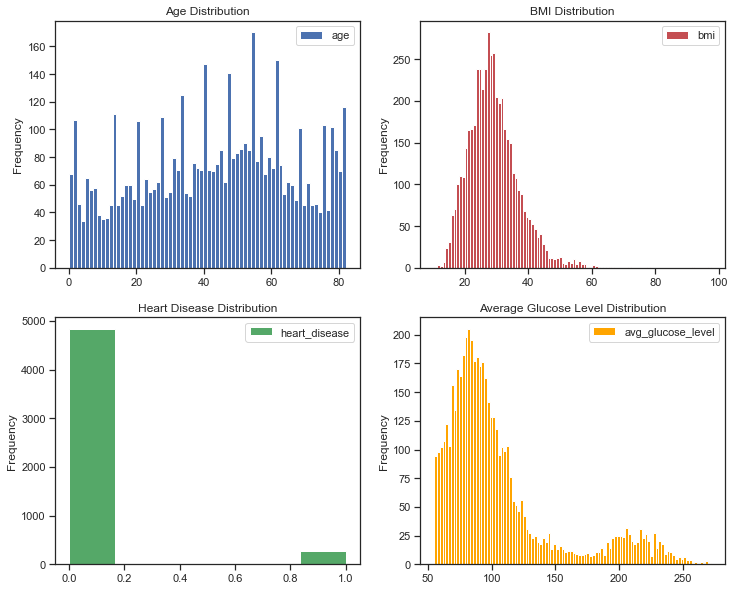

In [176]:
# Create subplots with 2 rows, 2 columns, and a figure size of (12, 10)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot a histogram of the 'age' column in the first subplot (top-left)
stroke.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
axes[0][0].set_title('Age Distribution')  # Set subplot title

# Plot a histogram of the 'bmi' column in the second subplot (top-right)
stroke.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
axes[0][1].set_title('BMI Distribution')  # Set subplot title

# Plot a histogram of the 'heart_disease' column in the third subplot (bottom-left)
stroke.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
axes[1][0].set_title('Heart Disease Distribution')  # Set subplot title

# Plot a histogram of the 'avg_glucose_level' column in the fourth subplot (bottom-right)
stroke.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
axes[1][1].set_title('Average Glucose Level Distribution')  # Set subplot title

# Display the subplots
plt.show()

De verdeling van leeftijden vertoont een gunstig patroon. Ik vermoed echter dat er uitschieters zijn in de BMI-data. Wat betreft de distributie van de gemiddelde glucosespiegel lijkt deze redelijk, gezien het normale gemiddelde voor bloedsuiker dat doorgaans onder de 140 ligt. Desondanks is het mogelijk dat deze variabele niet van significant belang is bij het vaststellen van een correlatie tussen diabetes en beroertes.

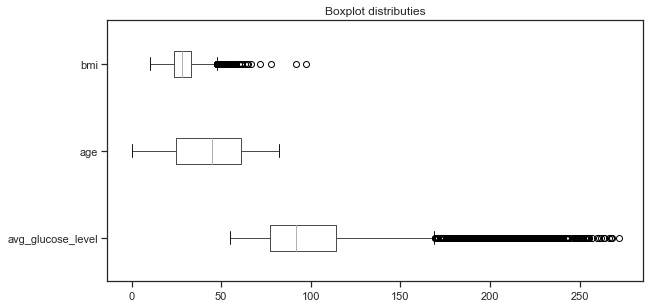

In [177]:
# Select the specific columns for the boxplot
columns_of_interest = ['avg_glucose_level', 'age', 'bmi']

# Create a boxplot for the selected columns
axs = stroke[columns_of_interest].boxplot(grid=False, vert=False, figsize=(9.6, 4.8))

# Set the title for the boxplot
axs.set_title("Boxplot distributies")

# Display the boxplot
plt.show()

hier zie je hetzelfde als in de barplots.

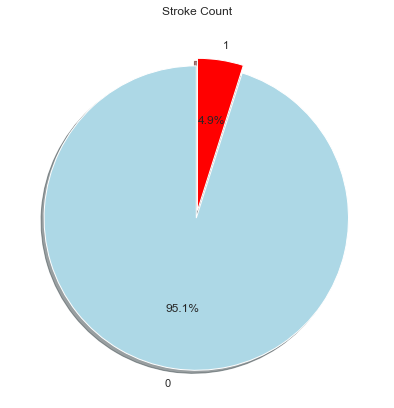

In [178]:
# Get the unique values and their counts from the 'stroke' column
labels = stroke['stroke'].value_counts(sort=True).index
sizes = stroke['stroke'].value_counts(sort=True)

# Define colors for the pie chart segments
colors = ["lightblue", "red"]

# Specify the extent to which each segment should be offset from the center
explode = (0.05, 0)

# Create a pie chart with the specified parameters
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Set the title for the pie chart
plt.title('Stroke Count')

# Display the pie chart
plt.show()

De waargenomen frequentie van beroertes is relatief laag, wat potentieel uitdagingen kan opleveren bij het ontwikkelen van een machine learning-algoritme. Er zal in een later stadium aandacht moeten worden besteed aan het adresseren van dit aspect.

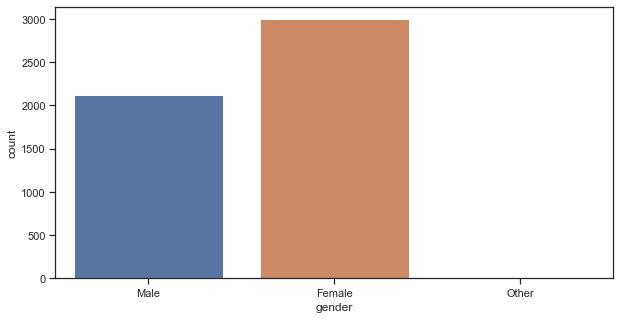

In [179]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'gender' in the 'stroke' dataset
sns.countplot(data=stroke, x='gender')

# Display the plot
plt.show()

De man vrouw verdeling ziet er goed uit.

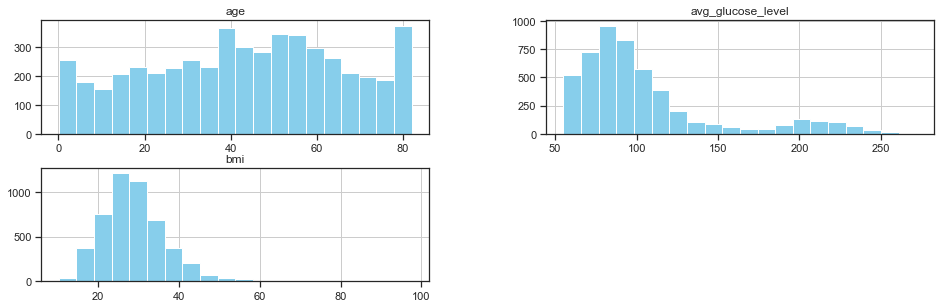

In [180]:
# Select specific columns ('age', 'avg_glucose_level', 'bmi') from the 'stroke' dataset
selected_columns = stroke[['age', 'avg_glucose_level', 'bmi']]

# Plot histograms for the selected columns with specified parameters
selected_columns.hist(bins=20, figsize=(16.0, 4.8), color='skyblue')

# Display the plot
plt.show()


Hier wordt de distributie van leeftijd (age), BMI en het gemiddelde glucosegehalte (avg glucose level) op een meer inzichtelijke manier gepresenteerd.

/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


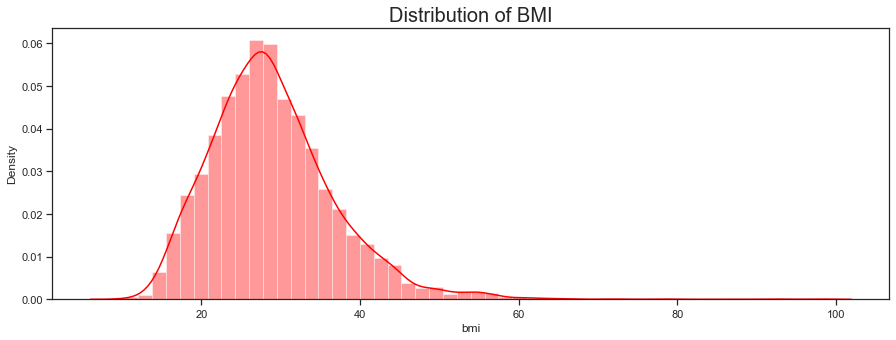

In [181]:
# Set up a subplot with a specific size for the plot
plt.subplots(figsize=(15, 5))

# Use Seaborn to plot the distribution of the 'bmi' column using a histogram
sns.distplot(stroke['bmi'], color='red')

# Set the title for the plot
plt.title('Distribution of BMI', fontsize=20)

# Display the plot
plt.show()


De distributie van BMI wordt hier duidelijker weergegeven, ondersteund door een trendlijn.

/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


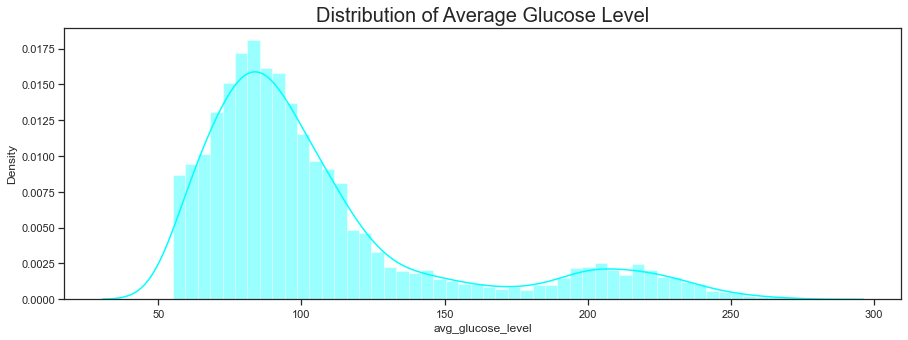

In [182]:
# Set up a subplot with a specific size for the plot
plt.subplots(figsize=(15, 5))

# Use Seaborn to plot the distribution of the 'avg_glucose_level' column using a histogram
sns.distplot(stroke['avg_glucose_level'], color='cyan')

# Set the title for the plot
plt.title('Distribution of Average Glucose Level', fontsize=20)

# Display the plot
plt.show()


Het gemiddelde bloedsuikerniveau (avg mg/dl) bevindt zich onder de grens van 140, wat overeenkomt met normale waarden. Bij het bestuderen van de dataset valt op dat er veel individuen zijn met een hoog glucosegehalte dit kan zijn door een ziekte als diabetes. Dit kan als normaal worden beschouwd en dient mogelijk niet als outliers te worden geïdentificeerd zonder overleg met de onderzoeker die de test heeft uitgevoerd.

/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


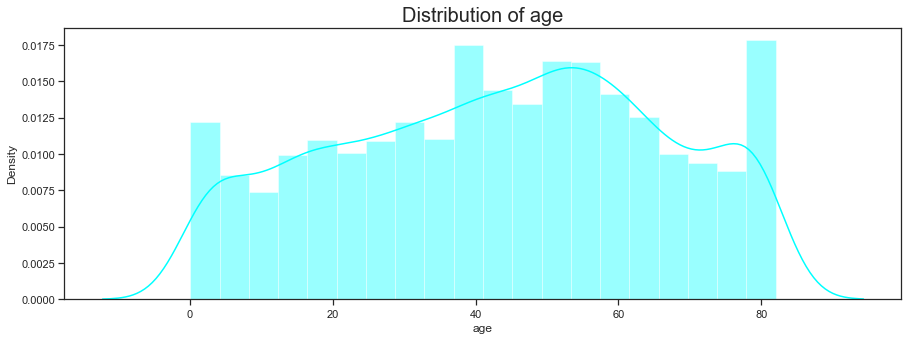

In [183]:
# Set up a subplot with a specific size for the plot
plt.subplots(figsize=(15, 5))

# Use Seaborn to plot the distribution of the 'age' column using a histogram
sns.distplot(stroke['age'], color='cyan')

# Set the title for the plot
plt.title('Distribution of age', fontsize=20)

# Display the plot
plt.show()


De leeftijds ditributie ziet er goed uit.

## Eda bivariaat

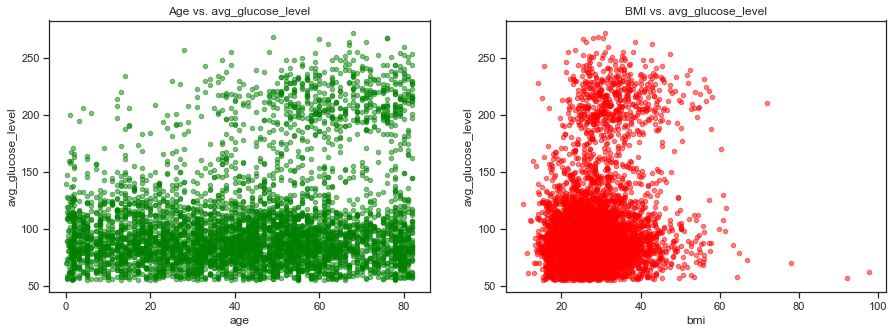

In [184]:
# Create a 1x2 subplot grid with a specified figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Scatter plot for 'age' vs. 'avg_glucose_level' on the first subplot (axes[0])
stroke.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")

# Scatter plot for 'bmi' vs. 'avg_glucose_level' on the second subplot (axes[1])
stroke.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="BMI vs. avg_glucose_level")

# Display the plots
plt.show()

De grafieken laten zien dat het gemiddelde glucosegehalte (Avg glucose level) over het algemeen hoog is bij oudere mensen. Verder blijkt dat bij een BMI van meer dan 40, het gemiddelde glucosegehalte juist lager is.

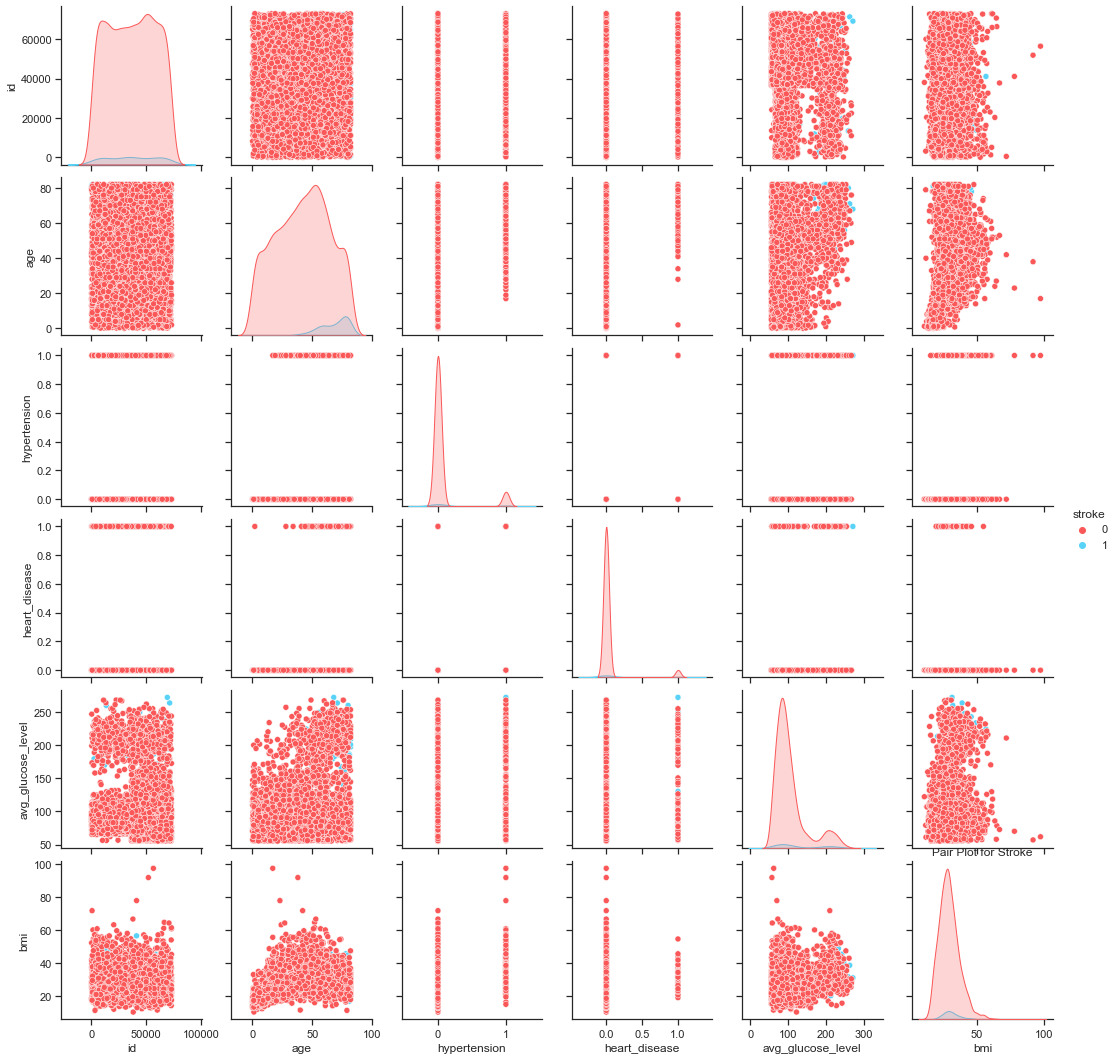

In [185]:
# Set the Seaborn style to 'ticks'
sns.set(style="ticks")

# Define a color palette with two colors for the pair plot
pal = ["#FA5858", "#58D3F7"]

# Create a pair plot using Seaborn to visualize relationships between variables, with hue based on the 'stroke' column
sns.pairplot(stroke, hue="stroke", palette=pal)

# Set the title for the pair plot
plt.title("Pair Plot for Stroke")

# Display the pair plot
plt.show()


Uit de grafieken blijkt dat het gemiddelde glucosegehalte (avg glucose level) en de leeftijd (age) de meest significante invloed lijken te hebben op het voorkomen van beroertes (strokes).

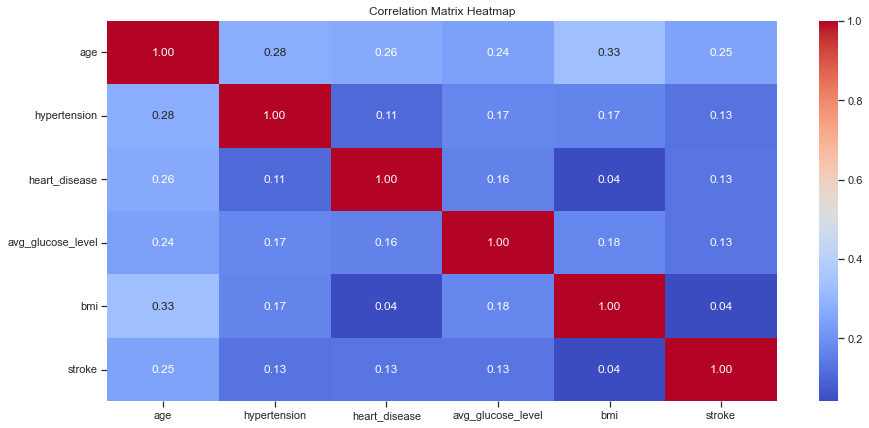

In [186]:
# Select numerical columns for correlation analysis
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Create a subset of the 'stroke' dataset containing only the selected numerical columns
stroke_numeric = stroke[numerical_columns]

# Set the figure size for the heatmap
plt.figure(figsize=(15, 7))

# Use Seaborn to create a heatmap of the correlation matrix for the numerical columns
sns.heatmap(stroke_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Set the title for the heatmap
plt.title("Correlation Matrix Heatmap")

# Display the heatmap
plt.show()



Uit de heatmap blijkt dat er geen aantoonbare correlatie bestaat tussen BMI en het optreden van beroertes.

# BMI outliers repareren 

Hieronder worden outliers geidentificeerd voor BMI.

In [187]:
# Identify outliers in the 'bmi' column by selecting rows where 'bmi' is greater than 50
bmi_outliers = stroke.loc[stroke['bmi'] > 50]

# Display the shape (number of rows) of the subset containing 'bmi' outliers
bmi_outliers_shape = bmi_outliers['bmi'].shape
bmi_outliers_shape


(79,)

Er zijn 79 outliers gevonden voor BMI.

In [188]:
# mean with outliers 
print(bmi_outliers['stroke'].value_counts())

0    78
1     1
Name: stroke, dtype: int64


Onderzoek welke groep mensen afwijkende waarden vertonen. Hierbij valt op dat van de 79 mensen die zijn onderzocht, er 78 geen beroerte hebben gehad, terwijl één persoon wel een beroerte heeft gehad van de groep met een onrealistisch BMI.

In [189]:
# fill nas with the mean
stroke['bmi'].fillna(stroke['bmi'].mean(),inplace=True)

Ik corrigeer de ontbrekende en onrealistische waarden door deze te vervangen door het gemiddelde BMI van alle patiënten. Op deze manier blijft de data behouden, wordt het realistischer, en bovendien blijkt uit de eerder uitgevoerde EDA (Exploratory Data Analysis) dat BMI de minste correlatie heeft met een beroerte, waardoor het geen doorslaggevende waarde is.

In [190]:
# print missing values
print ("\nMissing values :  ", stroke.isnull().sum().values.sum())


Missing values :   0


Er zijn geen missing values meer blijkt uit de test.

In [191]:
# Select categorical columns and the 'stroke' column from the 'stroke' dataset
cat_df = stroke[['gender', 'Residence_type', 'smoking_status', 'stroke']]

# Create a summary table by concatenating the cross-tabulations of each categorical column with the 'stroke' column
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])

summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

Onderzoek de verbanden tussen individuen met en zonder beroerte, met specifieke aandacht voor niet-numerieke variabelen.


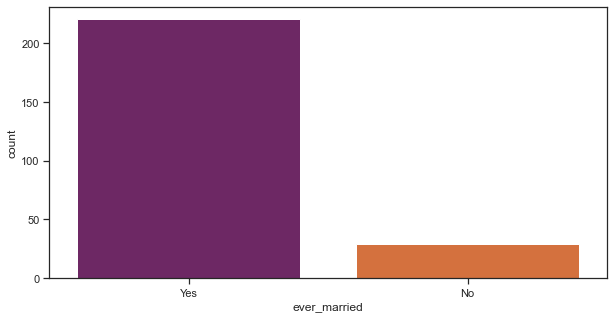

In [192]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Filter the 'stroke' dataset to include only rows where 'stroke' is equal to 1
strok = stroke.loc[stroke['stroke'] == 1]

# Create a count plot using Seaborn to visualize the distribution of 'ever_married' among stroke cases
sns.countplot(data=strok, x='ever_married', palette='inferno')

# Display the plot
plt.show()


Uit deze gegevens blijkt dat individuen met een relatie een verhoogd risico hebben op het ervaren van een stroke.

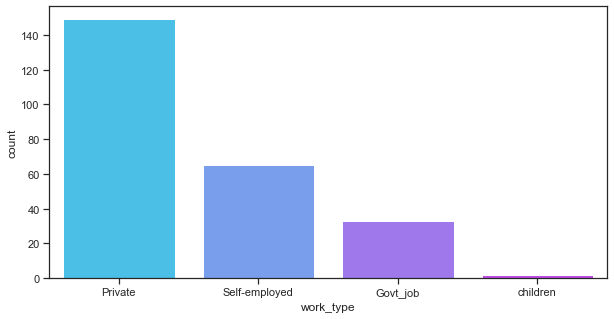

In [193]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'work_type' among stroke cases
sns.countplot(data=strok, x='work_type', palette='cool')

# Display the plot
plt.show()

Uit deze gegevens lijkt naar voren te komen dat mensen met een baan in de private sector een hoger risico op beroertes hebben in vergelijking met andere beroepscategorieën.

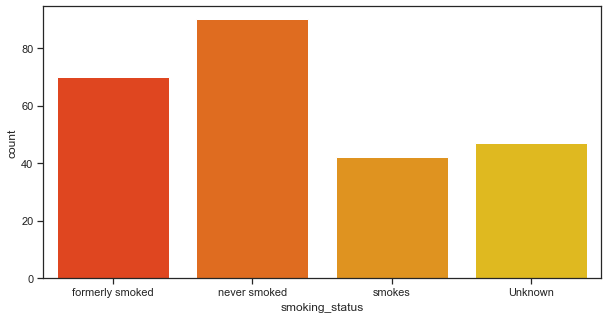

In [194]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'smoking_status' among stroke cases
sns.countplot(data=strok, x='smoking_status', palette='autumn')

# Display the plot
plt.show()


Indien er sprake is geweest van roken, blijkt uit deze dataset dat er een verhoogde kans op een beroerte lijkt te zijn.

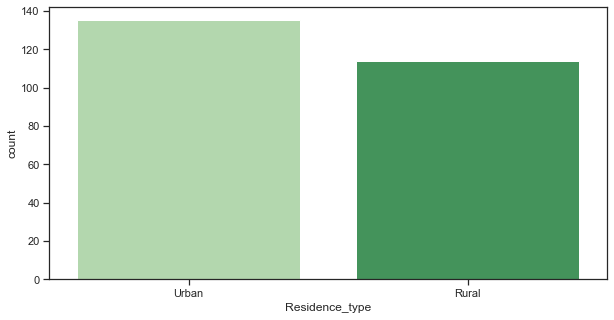

In [195]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'Residence_type' among stroke cases
sns.countplot(data=strok, x='Residence_type', palette='Greens')

# Display the plot
plt.show()


residence type heeft niks te maken met strokes blijkt uit de barplot.

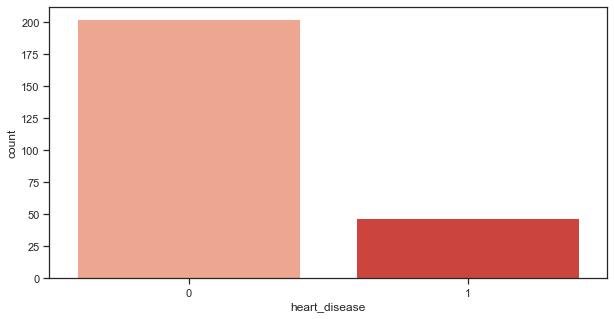

In [196]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'heart_disease' among stroke cases
sns.countplot(data=strok, x='heart_disease', palette='Reds')

# Display the plot
plt.show()


De meerderheid van de mensen die een beroerte hebben gehad, vertoont geen tekenen van hartziekte. Desalniettemin blijft het een significante factor die van invloed kan zijn.

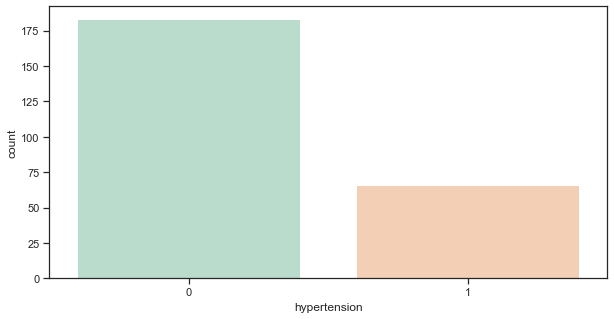

In [197]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'hypertension' among stroke cases
sns.countplot(data=strok, x='hypertension', palette='Pastel2')

# Display the plot
plt.show()


mMeer dan 25% van de gevallen van eem stroke hadden hypertension

In [198]:
# Get the number of unique groups (categories) in the 'stroke' column
Ngroups = stroke["stroke"].nunique()

# Get the total number of observations in the dataset
Ntotal = len(stroke.index)

# Import necessary libraries
from scipy import stats

# Define a function to compute ANOVA statistics for a given attribute
def anova_stats(attribute):
    # Create a list of lists containing the attribute values for each group (stroke category)
    groupdata = [data[attribute].tolist() for _, data in stroke.groupby("stroke")]
    
    # Perform one-way ANOVA test
    F, p = stats.f_oneway(*groupdata)
    
    # Calculate the effect size (η^2)
    η2 = F * (Ngroups-1) / (F * (Ngroups-1) + Ntotal - Ngroups)
    
    return F, p, η2

# Apply the ANOVA function to each numerical attribute in the dataset
anova = {attribute: anova_stats(attribute) for attribute in stroke.select_dtypes(include='number').columns}

# Create a DataFrame to display ANOVA statistics
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T


/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,$F$,$p$,$\eta^2$
id,0.208459,6.479970e-01,0.000041
age,326.916568,7.030778e-71,0.060151
hypertension,84.953542,4.367557e-20,0.016359
heart_disease,94.698406,3.451927e-22,0.018202
avg_glucose_level,90.503870,2.767811e-21,0.017410
bmi,7.759776,5.361957e-03,0.001517
stroke,inf,0.000000e+00,NaN


De resultaten van de ANOVA-test wijzen op significante verschillen in verschillende variabelen in relatie tot het optreden van een beroerte:

- Leeftijd (age): Er is een significant verschil in leeftijd tussen groepen, waarbij leeftijd een aanzienlijke invloed heeft op het optreden van een beroerte.

- Hypertensie (hypertension): Er is een significant verband tussen hypertensie en het optreden van een beroerte, met een matige invloed.

- Hartziekte (heart_disease): Groepen met en zonder hartziekte vertonen een significant verschil, waarbij hartziekte een matige invloed heeft op het optreden van een beroerte.

- Gemiddelde glucosewaarde (avg_glucose_level): Er is een significant verschil in gemiddelde glucosewaarden tussen groepen, met een matige invloed op het optreden van een beroerte.

- BMI (bmi): Hoewel er een significant verschil is in BMI tussen groepen, is de invloed op het optreden van een beroerte beperkt.

- Identificatienummer (id): Er is geen significant verschil tussen groepen op basis van identificatienummer.

- Eerdere beroerte (stroke): Er is een significant verschil in het optreden van een beroerte, maar de effectgrootte is niet beschikbaar.

Over het algemeen zijn leeftijd, hypertensie, hartziekte en gemiddelde glucosewaarden belangrijke factoren in verband met het risico op een beroerte, terwijl identificatienummer, BMI en eerdere beroerte minder invloed lijken te hebben. Interpretatie moet echter voorzichtig gebeuren en rekening houden met de specifieke context.

In [199]:
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
enc = LabelEncoder()

# Use LabelEncoder to transform categorical variables to numerical values
gender = enc.fit_transform(stroke['gender'])
smoking_status = enc.fit_transform(stroke['smoking_status'])
work_type = enc.fit_transform(stroke['work_type'])
Residence_type = enc.fit_transform(stroke['Residence_type'])
ever_married = enc.fit_transform(stroke['ever_married'])

# Update the 'stroke' DataFrame with the transformed values
stroke['ever_married'] = ever_married
stroke['Residence_type'] = Residence_type
stroke['smoking_status'] = smoking_status
stroke['gender'] = gender
stroke['work_type'] = work_type


Hier worden alle niet-numerieke variabelen omgezet in numerieke waarden, zodat ze later in het proces kunnen worden gebruikt.

In [200]:
# show the heads of the coluns to check if it changed.
stroke[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


Alle waardes zijn numeriek geworden blijkt uit de tabel.

### multivariate

In [201]:
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler and use it to scale numerical features in the 'stroke' dataset
scaled = StandardScaler().fit_transform(stroke.select_dtypes(include='number'))


In [202]:
# Import NumPy for mathematical operations
import numpy as np

# Create a DataFrame to display mean and standard deviation for each feature after scaling
statistics_df = pd.DataFrame({
    'mean': np.mean(scaled, axis=0),
    'std': np.std(scaled, axis=0)
}, index=stroke.columns[0:12])
statistics_df


,mean,std
id,-1.181920e-16,1.0
gender,-7.508671e-17,1.0
age,5.005781e-17,1.0
hypertension,-4.727682e-17,1.0
heart_disease,5.561978e-18,1.0
ever_married,-6.118176e-17,1.0
work_type,-2.113552e-16,1.0
Residence_type,-9.177264e-17,1.0
avg_glucose_level,1.001156e-16,1.0
bmi,6.118176e-17,1.0


De tabel toont de gemiddelde (mean) en standaardafwijking (std) van verschillende variabelen in een dataset. De gemiddelde waarde van elke variabele is zeer dicht bij nul, wat aangeeft dat de gegevens gecentreerd zijn rond het gemiddelde. De standaardafwijking is genormaliseerd tot 1, wat betekent dat de spreiding van de gegevens uniform is aangepast.

In [203]:
# Import PCA (Principal Component Analysis) from sklearn.decomposition
from sklearn.decomposition import PCA

# Fit PCA on the scaled data
pca = PCA().fit(scaled)

# Transform the scaled data using PCA
components = pca.transform(scaled)

# Iterate over the first 4 principal components
for n in range(4):
    # Create attribute names for the principal components
    attribute = f"PC-{n+1}"
    
    # Add new columns to the 'stroke' DataFrame with the principal component values
    stroke[attribute] = components[:, n]
    
    # Perform ANOVA on the newly added principal component
    anova[attribute] = anova_stats(attribute)


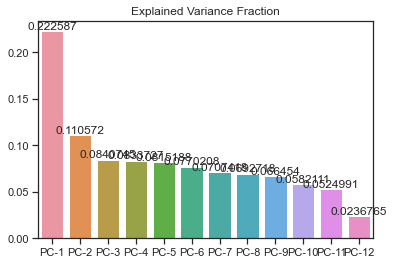

In [204]:
# Create a bar plot to visualize the explained variance ratio for each principal component
axs = sns.barplot(x=[f"PC-{n+1}" for n in range(12)], y=pca.explained_variance_ratio_)

# Add labels to the bars showing the explained variance ratio
axs.bar_label(axs.containers[0])

# Set the title for the bar plot
axs.set_title("Explained Variance Fraction")

# Display the plot
plt.show()


De eerste principale component vertaald 22% van de strokes blijkt uit de barplots.

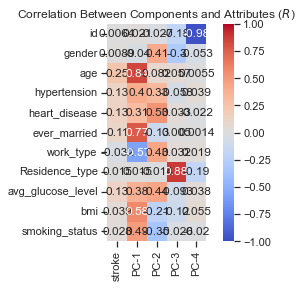

In [205]:
# Create a heatmap to visualize the correlation between principal components and original attributes
axs = sns.heatmap(stroke.corr().iloc[0:11, 11:22], annot=True, cmap="coolwarm", vmin=-1.0, vmax=1.0, square=True)

# Set the title for the heatmap
axs.set_title("Correlation Between Components and Attributes ($R$)")

# Display the heatmap
plt.show()


Bij Principal Component 1 lijken 'ever married' en 'leeftijd' de meest invloedrijke factoren te zijn. Voor Principal Component 2 lijken meerdere variabelen, zoals 'hartziekte', 'werktype' en 'gemiddeld glucosegehalte', belangrijke factoren te zijn. Principal Component 3 suggereert dat 'woonplaats' de voornaamste invloed heeft, terwijl Principal Component 4 aangeeft dat de 'ID' weinig nut heeft, omdat deze later wordt verwijderd, aangezien het geen invloed kan hebben op het model.

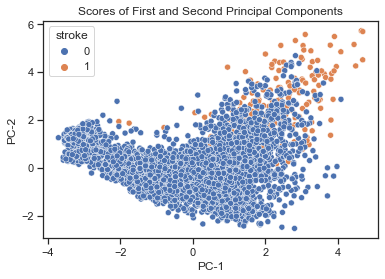

In [206]:
# Create a scatter plot to visualize scores of the first and second principal components
axs = sns.scatterplot(data=stroke, x="PC-1", y="PC-2", hue="stroke")

# Set the title for the scatter plot
axs.set_title("Scores of First and Second Principal Components")

# Display the plot
plt.show()


Er is een opmerkelijke verschuiving te zien in de grafiek van Principal Component 2 tussen de aanwezigheid en afwezigheid van een beroerte. Bovendien lijkt er een onderscheid waarneembaar te zijn, aangezien de waarden voor 'wel beroerte' iets hoger liggen dan die voor 'geen beroerte' bij Principal Component 2.

In [207]:
# Create a DataFrame to display ANOVA statistics for each principal component
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T


,$F$,$p$,$\eta^2$
id,0.208459,6.479970e-01,0.000041
age,326.916568,7.030778e-71,0.060151
hypertension,84.953542,4.367557e-20,0.016359
heart_disease,94.698406,3.451927e-22,0.018202
avg_glucose_level,90.503870,2.767811e-21,0.017410
bmi,7.759776,5.361957e-03,0.001517
stroke,inf,0.000000e+00,NaN
PC-1,470.945142,5.786238e-100,0.084415
PC-2,1313.456643,3.704618e-256,0.204542
PC-3,391.130225,6.061207e-84,0.071126


De resultaten voor de principal components (PC-1 tot PC-4) wijzen op significante verschillen en bieden inzicht in de bijdrage van deze componenten aan het optreden van een beroerte:

- PC-1: De F-waarde is hoog (470.945142) met een zeer lage p-waarde (5.786238e-100), wat aangeeft dat PC-1 significant geassocieerd is met het optreden van een beroerte. De effectgrootte (η²) is ook aanzienlijk hoog (0.084415), wat suggereert dat PC-1 een aanzienlijke invloed heeft op het risico op een beroerte.

- PC-2: De F-waarde is zeer hoog (1313.456643) met een extreem lage p-waarde (3.704618e-256), wat aangeeft dat PC-2 sterk geassocieerd is met het optreden van een beroerte. De effectgrootte (η²) is ook zeer hoog (0.204542), wat wijst op een substantiële invloed.

- PC-3: De F-waarde is hoog (391.130225) met een zeer lage p-waarde (6.061207e-84), en de effectgrootte (η²) is aanzienlijk (0.071126), wat aangeeft dat PC-3 significant bijdraagt aan het risico op een beroerte.

- PC-4: De F-waarde is significant (22.205104) met een lage p-waarde (2.515249e-06), maar de effectgrootte (η²) is relatief klein (0.004328). Dit suggereert dat PC-4 weliswaar significant is, maar een minder sterke invloed heeft op het optreden van een beroerte in vergelijking met de andere principal components.

Over het algemeen laten de resultaten zien dat de eerste vier principal components (PC-1 tot PC-4) significant geassocieerd zijn met het optreden van een beroerte. PC-2 lijkt de grootste invloed te hebben, gevolgd door PC-1, PC-3, en ten slotte PC-4

In [208]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Create an instance of KMeans with the number of clusters equal to Ngroups
kmeans = KMeans(n_clusters=Ngroups, n_init=100).fit(scaled)

# Add a new column "Cluster" to the 'stroke' DataFrame representing the cluster assignments
stroke["Cluster"] = pd.Categorical(kmeans.labels_ + 1)   # Adding 1 to cluster labels to start from one



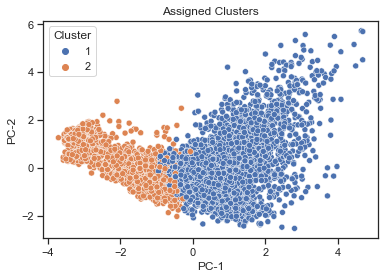

In [209]:
# Create a scatter plot to visualize the assigned clusters based on the first and second principal components
axs = sns.scatterplot(data=stroke, x="PC-1", y="PC-2", hue="Cluster")

# Set the title for the scatter plot
axs.set_title("Assigned Clusters")

# Display the plot
plt.show()


Er is een aanzienlijk onderscheid tussen Cluster 1 en Cluster 2 te zien in de grafiek van Principal Component 1. Echter, bij Principal Component 2 lijkt een dergelijk verschil minder opvallend te zijn.

Clusters zijn groepen van datapunten die vergelijkbaar zijn met elkaar en verschillend van datapunten in andere clusters. In dit contextuele geval worden clusters mogelijk bepaald door de eigenschappen van de datapunten in relatie tot Principal Component 1 en 2. Het duidelijke verschil in Principal Component 1 tussen Cluster 1 en Cluster 2 suggereert dat deze clusters zich onderscheiden op basis van de factoren die door Principal Component 1 worden vertegenwoordigd. Principal Component 2 lijkt echter minder bij te dragen aan het onderscheid tussen deze clusters.

In [210]:
# Create a cross-tabulation to analyze the distribution of stroke cases within each cluster
pd.crosstab(stroke["stroke"], stroke["Cluster"])

Cluster,1,2
stroke,,
0,3326,1535
1,246,3


Dit geeft aan hoeveel individuele datapunten in elk cluster vallen, op basis van hun beroerte-status (0 voor geen beroerte, 1 voor wel beroerte). Bijvoorbeeld, in Cluster 1 is de overgrote meerderheid van de gevallen geen beroerte (3326) en een minderheid wel (246). In Cluster 2 lijkt de meerderheid ook geen beroerte te hebben (1535), maar het aantal gevallen met een beroerte is hier aanzienlijk lager (3). 

### data processing

In [211]:
# ID column is not usefull
stroke = stroke.drop('id', axis=1)

Verwijder de ID's van de dataset omdat dat niet van belang is. 

In [212]:
# show head to see Id is deleted
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,PC-1,PC-2,PC-3,PC-4,Cluster
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,3.257139,4.884889,1.761248,0.794172,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,1.820197,2.125227,0.275496,-0.674924,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,3.011470,3.703640,0.141355,-0.000406,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,2.265938,1.032082,1.851938,-1.464764,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,2.657212,3.070131,0.690653,1.708558,1


De kolom ID's zijn verwijderd zie je in de tabel.

## machine learning 

In [213]:
# Separate features (X) and target variable (y)
x = stroke.drop('stroke', axis=1)  # Features (independent variables)
y = stroke['stroke']                # Target variable (dependent variable)
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)


Shape of X:  (5110, 15)
Shape of Y:  (5110,)


Afzonderlijke features (X) en target values (y)

In [214]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Display the number of transactions in the training and testing sets
print("Number of transactions in X_train dataset: ", x_train.shape)
print("Number of transactions in y_train dataset: ", y_train.shape)
print("Number of transactions in X_test dataset: ", x_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)


Number of transactions in X_train dataset:  (4088, 15)
Number of transactions in y_train dataset:  (4088,)
Number of transactions in X_test dataset:  (1022, 15)
Number of transactions in y_test dataset:  (1022,)


split de data in train en test datasets.

In [215]:
# Import SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

# Display the counts of labels '1' and '0' before oversampling
print("Before OverSampling, counts of label '1':", sum(y_train == 1))
print("Before OverSampling, counts of label '0':", sum(y_train == 0), "\n")

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

# Display the shape of the oversampled training set
print('After OverSampling, the shape of train_X:', x_train_res.shape)
print('After OverSampling, the shape of train_y:', y_train_res.shape, "\n")

# Display the counts of labels '1' and '0' after oversampling
print("After OverSampling, counts of label '1':", sum(y_train_res == 1))
print("After OverSampling, counts of label '0':", sum(y_train_res == 0))



Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 15)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


In deze code wordt de Synthetic Minority Over-sampling Technique (SMOTE) toegepast om de onbalans in klassen aan te pakken. Door synthetische voorbeelden te genereren, helpt SMOTE om de minderheidsklasse te versterken en evenwicht te brengen tussen de klassen in de trainingsset. Dit kan nuttig zijn bij het trainen van modellen om betere voorspellingen te maken, vooral wanneer er een onbalans is tussen de klassen.

In [216]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

models = [
    DummyClassifier,
    DecisionTreeClassifier,
    LinearDiscriminantAnalysis,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    AdaBoostClassifier
]

Import de models die ik wil gebruiken.

In [217]:
from sklearn.model_selection import cross_validate

# Definieer de kenmerken (X) en de target (y)
X = stroke.drop('stroke', axis=1)  # Verwijder de 'stroke' kolom om de kenmerken te krijgen
y = stroke['stroke']  # Neem alleen de 'stroke' kolom als de target

missing_values = X.isnull().sum()
print("Ontbrekende waarden per kolom:")
print(missing_values)
metric_scores = {}
for model in models:
    scores = cross_validate(model(), X, y, cv=2, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores
    
pd.DataFrame(metric_scores).T

Ontbrekende waarden per kolom:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
PC-1                 0
PC-2                 0
PC-3                 0
PC-4                 0
Cluster              0
dtype: int64


,fit_time,score_time,test_score,train_score
DummyClassifier,0.001744,0.000464,0.951272,0.951272
DecisionTreeClassifier,0.016358,0.003785,0.984344,1.000000
LinearDiscriminantAnalysis,0.012988,0.003077,0.942661,0.943836
GaussianNB,0.005138,0.003310,0.883366,0.883757
KNeighborsClassifier,0.006289,0.166067,0.949706,0.958708
RandomForestClassifier,0.397098,0.035192,0.990020,1.000000
AdaBoostClassifier,0.247757,0.034161,0.999022,1.000000


Hier zie je dat de algoritmes een hoge score hebben maar de dummyclassifier heeft ook een 95% score dit komt
omdat de data oneven verdeeld is n het dus altijd kan zeggen dat er geen stroke was en dan goed voorspelt omdat dat bij de meeste gevallen zo is.